In [ ]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV file
file_path = file_path = r'C:\Users\victo\Downloads\output.csv'
data = pd.read_csv(file_path)
data.head() #some few rows

,URL,Description,Location,Price,Image Directory
0,https://www.spitogatos.gr/en/property/1114561946,"Apartment for sale, seventh floor, in Kypseli....",Kipseli (Athens - Center),450000,images\_en_property_1114561946
1,https://www.spitogatos.gr/en/property/1115865138,Building FOR SALE in Gizi - Pedion Areos Gkyzi...,"Gkyzi - Arios Pagos, Gizi - Pedion Areos (Athe...",480000,images\_en_property_1115865138
2,https://www.spitogatos.gr/en/property/1115940095,NaN,"Gkyzi - Arios Pagos, Gizi - Pedion Areos (Athe...",168000,images\_en_property_1115940095
3,https://www.spitogatos.gr/en/property/1115945549,GYZI - BETWEEN GYZI SQUARE AND FINOPOULOU HILL...,"Gkyzi - Arios Pagos, Gizi - Pedion Areos (Athe...",45000,images\_en_property_1115945549
4,https://www.spitogatos.gr/en/property/1115755486,"Apartment For Sale, 1st floor 85 sqm, in Gyzi ...","Gkyzi - Arios Pagos, Gizi - Pedion Areos (Athe...",175000,images\_en_property_1115755486


In [ ]:
# Descriptive statistics for Price
price_stats = data['Price'].describe()
print("Descriptive Statistics for Price:")
print(price_stats)

# Descriptive statistics for Location
location_stats = data['Location'].value_counts()
print("\nDescriptive Statistics for Locations (Counts of each location):")
print(location_stats)

Descriptive Statistics for Price:
count    5.890000e+02
mean     5.195890e+05
std      1.429701e+06
min      1.700000e+04
25%      8.500000e+04
50%      1.800000e+05
75%      4.490000e+05
max      1.800000e+07
Name: Price, dtype: float64

Descriptive Statistics for Locations (Counts of each location):
Location
Nea Smyrni (Athens - South)                                52
Kato Petralona, Petralona (Athens - Center)                40
Center, Nea Smyrni (Athens - South)                        38
Ano Petralona, Petralona (Athens - Center)                 38
Ano Nea Smyrni, Nea Smyrni (Athens - South)                22
                                                           ..
Attiko Alsos, Poligono - Tourkovounia (Athens - Center)     1
Nosokomeio Pedon, Goudi (Athens - Center)                   1
Goudi, Zografou (Athens - South)                            1
Mouseio, Exarchia - Neapoli (Athens - Center)               1
Kastella - Passalimani (Piraeus)                            1
Name: 

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
URL                 0
Description        46
Location            0
Price               0
Image Directory     0
log_price           0
dtype: int64


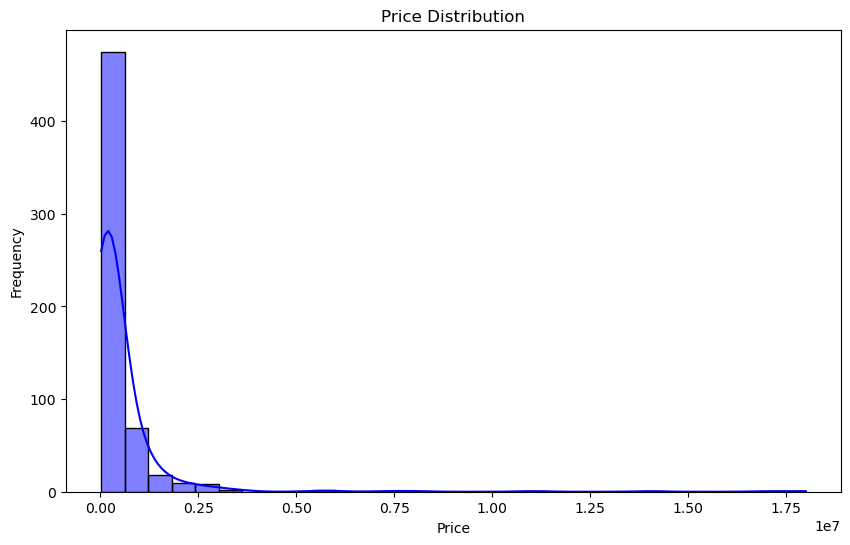

In [ ]:
# Plotting Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

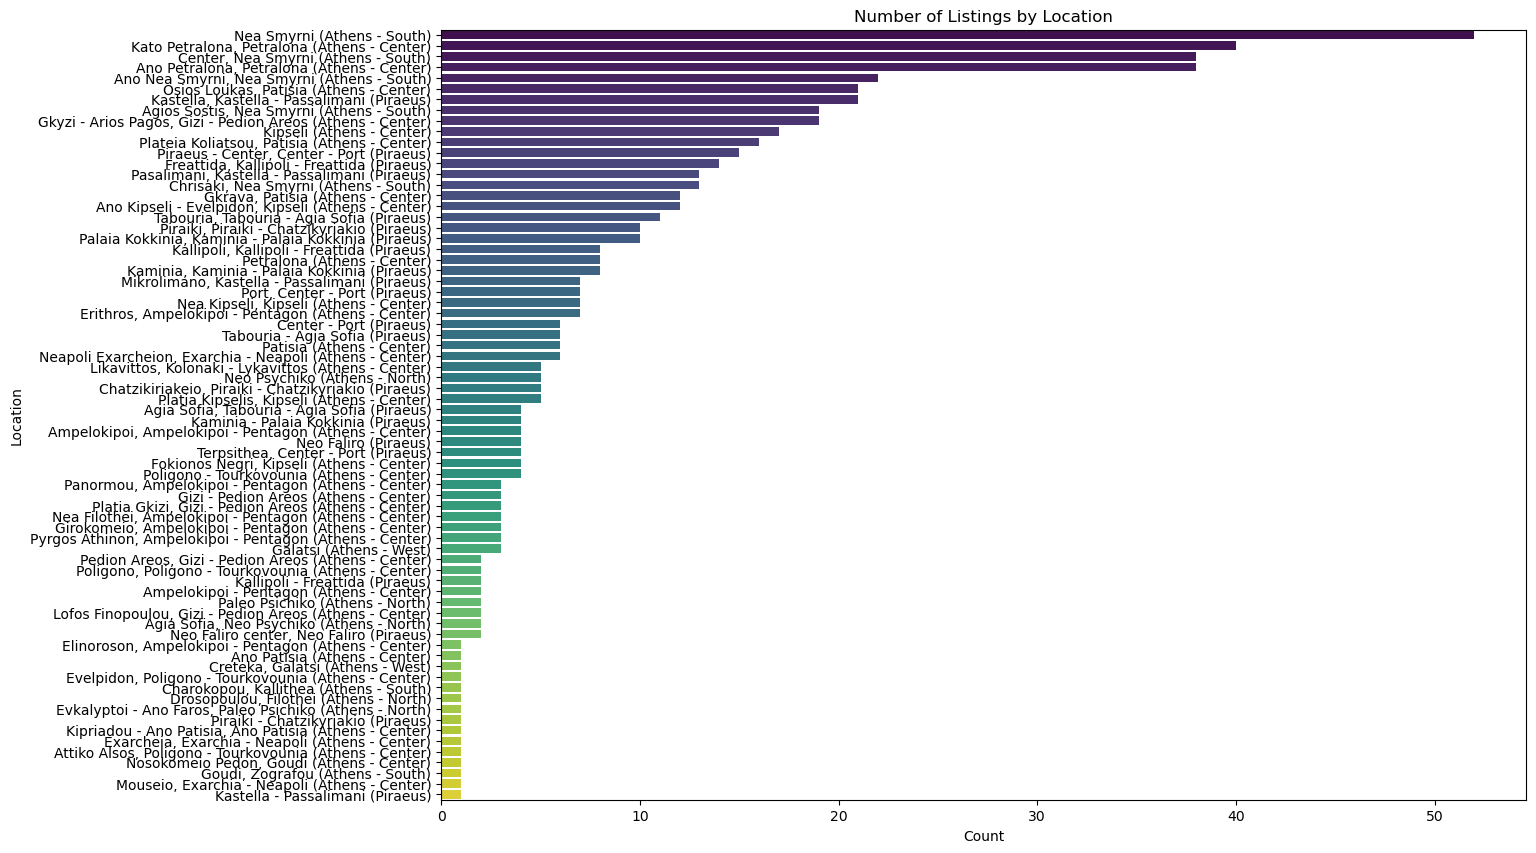

In [ ]:
# Plotting the count of listings by Location
plt.figure(figsize=(14, 10))
sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index, palette='viridis')
plt.title('Number of Listings by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

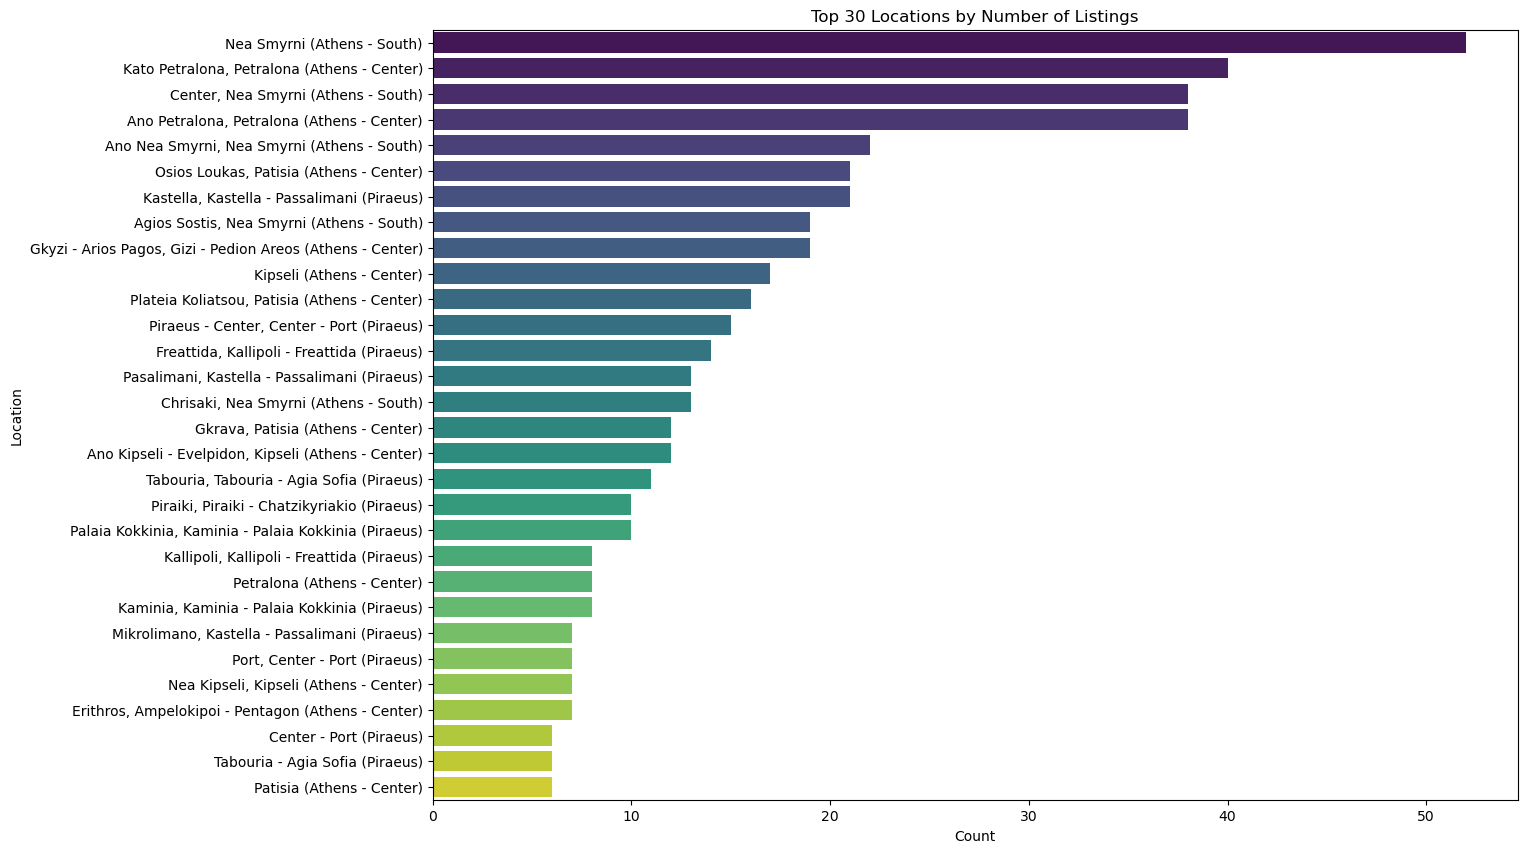

In [ ]:
# Extract the top 30 locations by count
top_30_locations = data['Location'].value_counts().head(30)

# Plotting the count of listings for the top 30 locations
plt.figure(figsize=(14, 10))
sns.countplot(y='Location', data=data, order=top_30_locations.index, palette='viridis')

# Add titles and labels
plt.title('Top 30 Locations by Number of Listings')
plt.xlabel('Count')
plt.ylabel('Location')

# Show the plot
plt.show()

In [ ]:
# Extract the counts of each unique location
location_counts = data['Location'].value_counts()

# Create a function to aggregate counts for similar locations based on keywords
def aggregate_location_counts(keyword):
    """Function to sum up all listings for a specific keyword in the location names"""
    count = location_counts[location_counts.index.str.contains(keyword, case=False)].sum()
    return count

# Get unique location names
unique_location_keywords = ['Nea Smyrni', 'Petralona', 'Goudi', 'Exarchia', 'Piraeus',
    'Zografou', 'Kolonaki', 'Ano Petralona', 'Center', 'Kastella']

# Create a dictionary to store the results for all unique location keywords
aggregated_counts = {location: aggregate_location_counts(location) for location in unique_location_keywords}

# Print the total listings for each location keyword
for location, count in aggregated_counts.items():
    print(f"Total number of listings in {location}: {count}")

Total number of listings in Nea Smyrni: 144
Total number of listings in Petralona: 86
Total number of listings in Goudi: 2
Total number of listings in Exarchia: 8
Total number of listings in Piraeus: 163
Total number of listings in Zografou: 1
Total number of listings in Kolonaki: 5
Total number of listings in Ano Petralona: 38
Total number of listings in Center: 337
Total number of listings in Kastella: 42


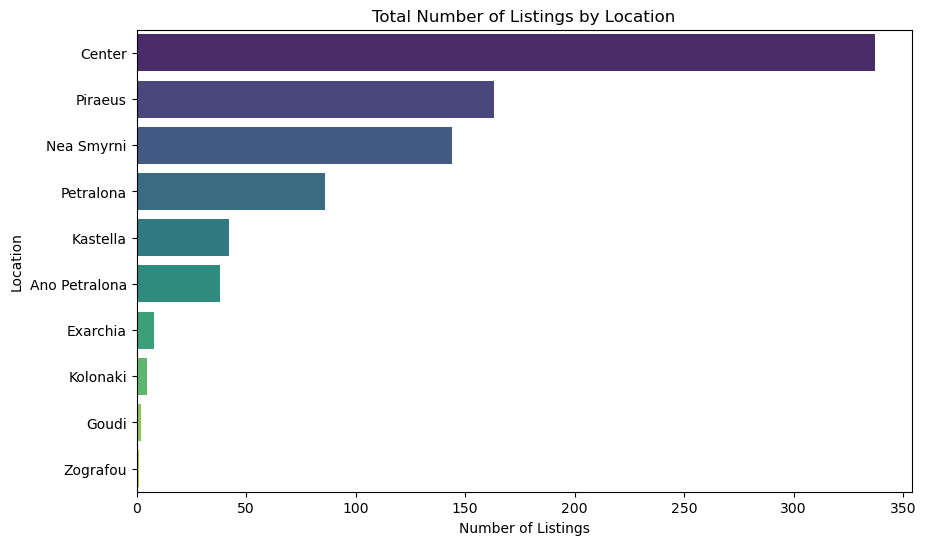

In [ ]:
# Sort the aggregated_counts dictionary by values in descending order
sorted_aggregated_counts = dict(sorted(aggregated_counts.items(), key=lambda item: item[1], reverse=True))

# Convert the sorted dictionary into two lists: locations and counts
locations = list(sorted_aggregated_counts.keys())
counts = list(sorted_aggregated_counts.values())

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=locations, palette='viridis')

# Add titles and labels
plt.title('Total Number of Listings by Location')
plt.xlabel('Number of Listings')
plt.ylabel('Location')

# Show the plot
plt.show()

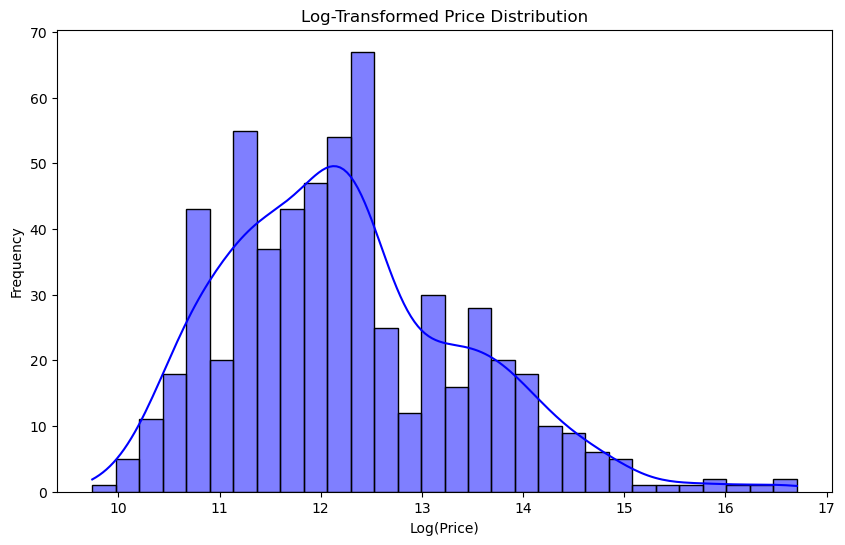

In [ ]:
import numpy as np

# Apply log transformation to prices (adding 1 to avoid log(0) errors)
data['log_price'] = np.log1p(data['Price'])

# Plot the histogram of log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True, bins=30, color='blue')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

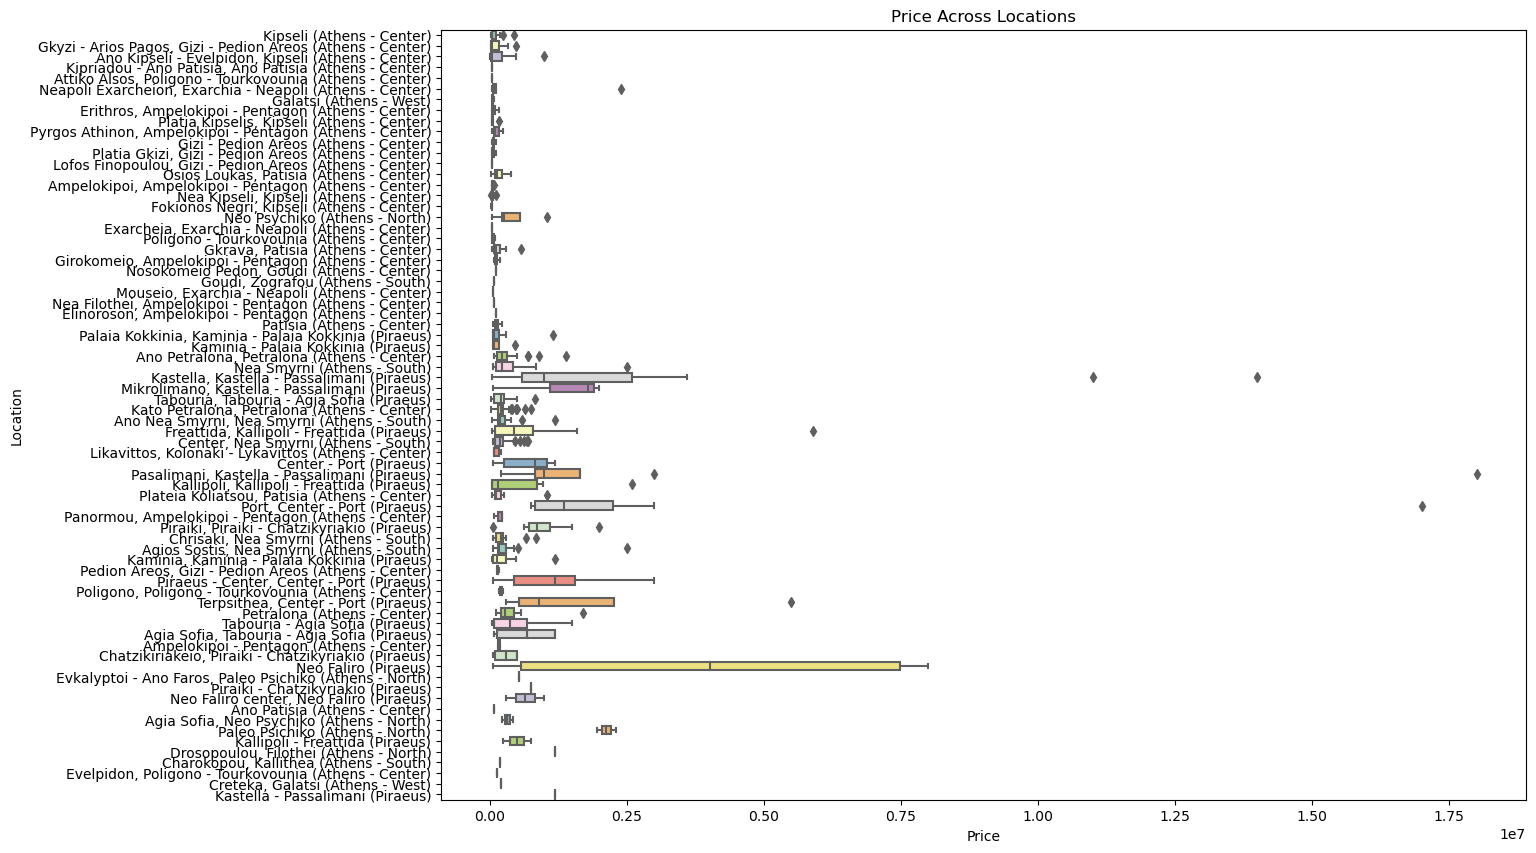

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Price', y='Location', data=data, palette='Set3')
plt.title('Price Across Locations')
plt.show()


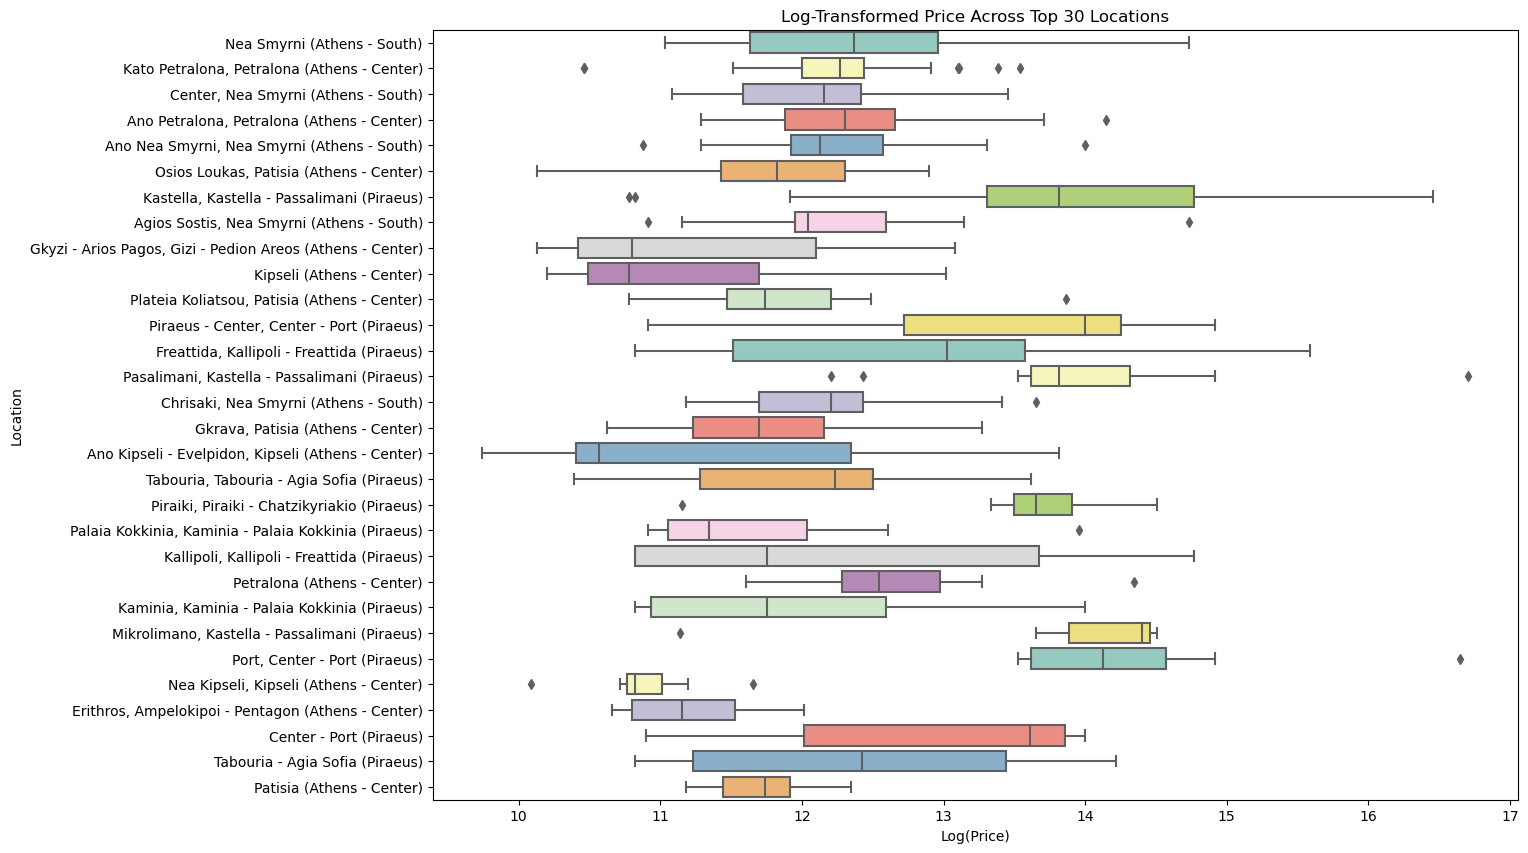

In [ ]:
# Get the top 30 locations by count
top_30_locations = data['Location'].value_counts().head(30).index

# Filter the dataset for only the top 30 locations
top_30_data = data[data['Location'].isin(top_30_locations)]

# Plotting the log-transformed price distribution across the top 30 locations
plt.figure(figsize=(14, 10))
sns.boxplot(x='Log_Price', y='Location', data=top_30_data, palette='Set3', order=top_30_locations)
plt.title('Log-Transformed Price Across Top 30 Locations')
plt.xlabel('Log(Price)')
plt.ylabel('Location')
plt.show()

Price Distribution by Bins:
Price
(100000, 300000]       235
(0, 100000]            183
(500000, 1000000]       66
(1000000, 18000000]     61
(300000, 500000]        44
Name: count, dtype: int64


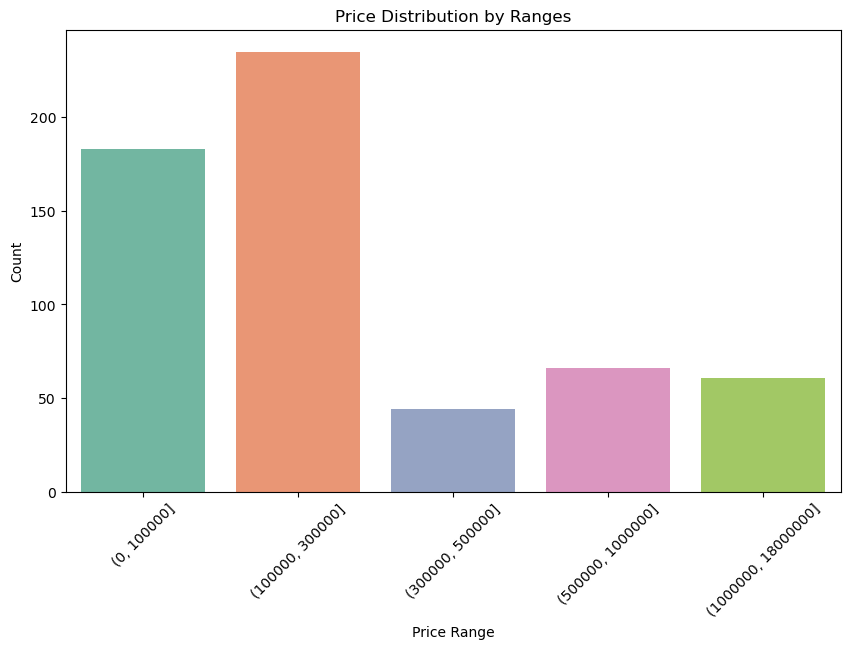

In [ ]:
# Create bins for price ranges
price_bins = pd.cut(data['Price'], bins=[0, 100000, 300000, 500000, 1000000, data['Price'].max()])
price_bin_counts = price_bins.value_counts()
print("Price Distribution by Bins:")
print(price_bin_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=price_bins, data=data, palette='Set2')
plt.title('Price Distribution by Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Define geographical regions with additional locations
def categorize_location(location):
    south = ['Nea Smyrni', 'Ano Nea Smyrni', 'Agios Sostis', 'Piraeus', 'Pasalimani', 'Kastella', 'Kallipoli', 'Kallithea', 'Charokopou']
    west = ['Chaidari', 'Peristeri', 'Aigaleo', 'Korydallos', 'Nikaia', 'Galatsi', 'Poligono - Tourkovounia', 'Poligono']
    center = ['Petralona', 'Kato Petralona', 'Kolonaki', 'Exarchia', 'Goudi', 'Zografou', 'Gkyzi', 'Kipseli', 'Patisia', 'Ano Kipseli', 'Gkrava',
              'Ampelokipoi', 'Panormou', 'Erithros', 'Pedion Areos', 'Ampelokipoi - Pentagon', 'Lofos Finopoulou', 'Platia Gkizi', 'Girokomeio']
    north = ['Marousi', 'Kifisia', 'Chalandri', 'Nea Ionia', 'Metamorfosi', 'Neo Psychiko', 'Paleo Psichiko', 'Nea Filothei', 'Drosopoulou']

    if any(area in location for area in south):
        return 'South'
    elif any(area in location for area in west):
        return 'West'
    elif any(area in location for area in center):
        return 'Center'
    elif any(area in location for area in north):
        return 'North'
    else:
        return 'Other'

# Apply the function to categorize the locations
data['Region'] = data['Location'].apply(categorize_location)

# Filter out rows categorized as "Other"
filtered_data = data[data['Region'] != 'Other']

# Count the listings by region, excluding "Other"
region_counts = filtered_data['Region'].value_counts()
region_counts

Region
South     308
Center    258
West       12
North      11
Name: count, dtype: int64

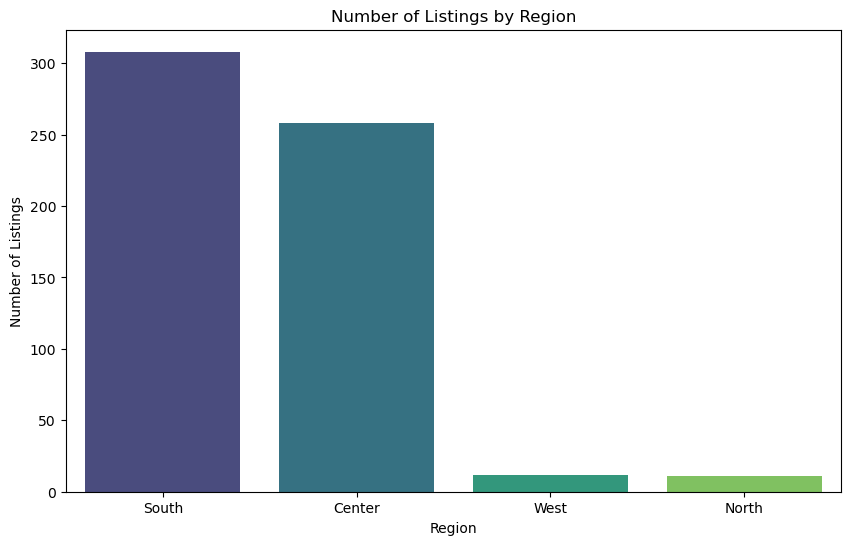

In [ ]:
# Plotting the counts by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Listings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Listings')
plt.show()

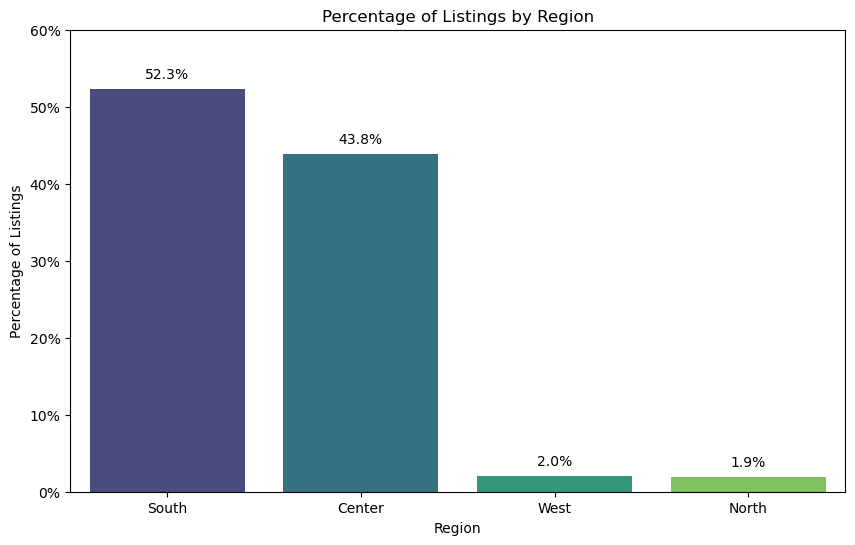

In [ ]:
# Calculate the percentage of listings for each region
total_listings = region_counts.sum()
region_percentages = (region_counts / total_listings) * 100

# Plotting the percentages by region
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=region_counts.index, y=region_percentages, palette='viridis')

# Adding percentages above the bars
for i, percentage in enumerate(region_percentages):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Set percentage labels on y-axis
ax.set_yticks(range(0, 70, 10))  # Set the y-ticks in percentage from 0% to 70% for better visualization
ax.set_yticklabels([f'{x}%' for x in range(0, 70, 10)])

# Add titles and labels
plt.title('Percentage of Listings by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Listings')

# Show the plot
plt.show()

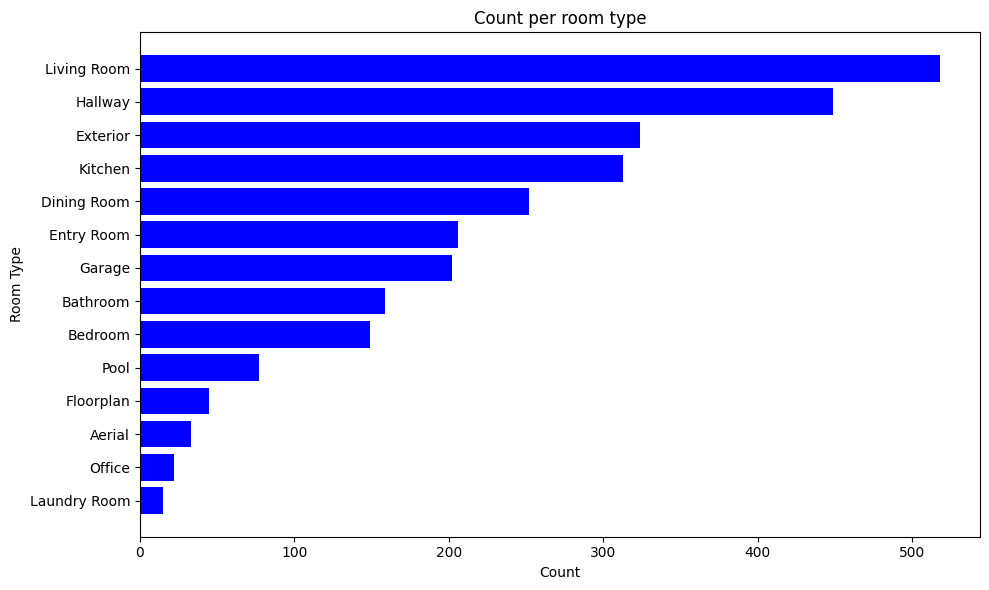

In [ ]:

# rooms type and corresponding counts
rooms = ['Entry Room', 'Living Room', 'Kitchen', 'Bathroom', 'Pool', 'Exterior', 'Hallway', 'Garage', 'Dining Room',
         'Aerial', 'Floorplan', 'Bedroom', 'Office', 'Laundry Room']
counts = [206, 518, 313, 159, 77, 324, 449, 202, 252, 33, 45, 149, 22, 15]

# Sort the data based on counts in descending order
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=False)
sorted_rooms = [rooms[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

# Create the sorted bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_rooms, sorted_counts, color='blue')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.title('Count per room type')
plt.tight_layout()
plt.show()
